## Logic Based FizzBuzz Function [Software 1.0]

In [25]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation. If a number is divisible by 3 and 5 we call it fizzbuzz,if divisible by 3 only we call it fizz
    # if divisible by 5 only we call it buzz and otherwise we call it other
    if n % 3 == 0 and n % 5 == 0:
        return 'fizzbuzz'
    elif n % 3 == 0:
        return 'fizz'
    elif n % 5 == 0:
        return 'buzz'
    else:
        return 'other'

## Create Training and Testing Datasets in CSV Format

In [26]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # Lists in python are mutable data structures which maintains the order of elements.It has methods like append() 
    # which can be used to modify the data structure during the processing of the data
    
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Algorithms learn from the data that is given to them.It figures out the pattern and relationships in the data
    # that is provided
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # Dataframe is row column (2D) rectangular grid to give a tabular representation of data. We need this to convert
    # integers to vectors.
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv . To create training and testing datasets
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [27]:
def processData(dataset):
    
    # Why do we have to process? As we have to convert the input data to binary format 10 bit.
    # As we are using categorical cross entropy loss function we need to convert our target inputs to categorical format
    # for eg if we have 4 classed ,it will be 4D vector where it is all 0's except for a 1 which corresponds to the
    # class of the sample.That is why we are using to_categorical method from keras.np_utils
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [28]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # To covert the integer to 10 bit binary format as the max input value we have is 1000(1111101000 in binary).
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [29]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "fizzbuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard
import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256 # Increased number of dense layer nodes to 512
second_dense_layer_nodes = 128
third_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # A model in simple terms is a subfield which finds relationship between the equation variables to predict
    # the outcome of the samples. It is a learning algorithm that learns from relationships between variables in the 
    # training data and outputs a Machine Leaning model that can predict the outcomes of the new samples
    
    # Why use Dense layer and then activation?
    # A dense layer is used when a linear operation is performed on the layer's input vectors and every input is 
    # connected to every output node by a weight follwed by a non linear activation function.
    # An activation function determines to what extent the output will be affecting the final result.
    
    
    # Why use sequential model with layers?
    # A sequential model is a model where layers are stacked up sequentially and linearly.As we are having a single 
    # input source ,sequential model is most suited.
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    #model.add(LeakyReLU(alpha=.001))
    model.add(Activation('relu'))
    
    
    model.add(Dense(second_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    # relu provides better activation function when there is multi class classifier .It works best as a general
    # approximator. y=max(0,x). y=x if x is +ve and 0 otherwise.As it simple mathematical function which boosts the
    # network
    
    # Why dropout?
    # Dropout is necessary as it prevents overfitting of neural network(overlearning).This basically means those units(nodes)
    # are not trained (given as probability value as 0.2 in this case ).It reduces the interdependencies among the 
    # neural nodes by introducing randomness and prevents noise.
    model.add(Dropout(drop_out))
    
    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # Softmax is a categorical probability distribution,which not only gets the output in 0,1 from relu or sigmoid and
    # it also transforms the output such that total probability is 1. The class getting the max probability in the vector 
    # gets activated
    
    model.summary()
    plot_model(model, to_file='final_model_plot.png', show_shapes=True, show_layer_names=True)
    # Why use categorical_crossentropy?
    # It is a loss function used to compare the error between the predicted and true labels given by 
    # H(p,q)=sum(p(x)log q(x)). Summation is done from1 to number of classes in total(4 in this example).Mostly used
    # in case of multiclass categorical problems
    # We can also use sparse_categorical_crossentropy if we keep our input values in integer form
    
    # In rmsprop we take square root summation of gradients and then divide it by current gradient.The learning rate
    # is adaptive based on the average of the recent gradients for the weights
    # In contour plot let w be the forward movement which needs to be fast and b as upward which needs to be slow 
    # to reach the center and B is the learning rate.
    # Sdw=B*Sdw+(1-B)(dw)^2 and Sdb=B*Sdb+(1-B)(db)^2 ,then square root of db and dw is taken to reduce the weights
    
    
    # Using Adam optimizer(adaptive momentum estimation)  where lr or learning rate is set to default 0.001 and 
    # beta1 as 0.99 and beta2 as 0.999 .The Adam optimization algorithm is an extension to stochastic gradient 
    # descent algorithm.The learning rate is adaptive and keeps on improving.
    model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [31]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [32]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
_________________________________________________________________
activation_9 (Activation)    (None, 4)                 0         
Total para

# <font color = blue>Run Model</font>

In [33]:
validation_data_split = 0.2 # This is the validation data split ratio from the training set .This means last 20% of
# data will be used as the validation set.
num_epochs = 1000 # epochs are the number of datasets given to the model to learn.Changing to 1000 for 3 dense layers
# as accuracy is reaching 0.99 in the first 200 epochs only 
model_batch_size = 128 # No of training examples used per iteration
tb_batch_size = 32 # batch_size used in callback functions to get the statistics of the model that is getting trained
early_patience = 100 # no of epochs with no improvement after which training is stopped

# EarlyStopping is used to stop the training when a monitored value stops improving.
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/1000
720/720 [==============================] - 1s 774us/step - loss: 1.2675 - acc: 0.4972 - val_loss: 1.1678 - val_acc: 0.5333
Epoch 2/1000
720/720 [==============================] - 0s 200us/step - loss: 1.1580 - acc: 0.5333 - val_loss: 1.1648 - val_acc: 0.5333
Epoch 3/1000
720/720 [==============================] - 0s 201us/step - loss: 1.1539 - acc: 0.5333 - val_loss: 1.1623 - val_acc: 0.5333
Epoch 4/1000
720/720 [==============================] - 0s 208us/step - loss: 1.1509 - acc: 0.5333 - val_loss: 1.1530 - val_acc: 0.5333
Epoch 5/1000
720/720 [==============================] - 0s 204us/step - loss: 1.1411 - acc: 0.5319 - val_loss: 1.1475 - val_acc: 0.5333
Epoch 6/1000
720/720 [==============================] - 0s 207us/step - loss: 1.1357 - acc: 0.5333 - val_loss: 1.1471 - val_acc: 0.5333
Epoch 7/1000
720/720 [==============================] - 0s 208us/step - loss: 1.1343 - acc: 0.5333 - val_loss: 1.1484 - val_acc: 0.5333
Ep

720/720 [==============================] - 0s 208us/step - loss: 0.6773 - acc: 0.7597 - val_loss: 0.9848 - val_acc: 0.5889
Epoch 61/1000
720/720 [==============================] - 0s 202us/step - loss: 0.6445 - acc: 0.7472 - val_loss: 0.9690 - val_acc: 0.6056
Epoch 62/1000
720/720 [==============================] - 0s 201us/step - loss: 0.6401 - acc: 0.7778 - val_loss: 0.9614 - val_acc: 0.5944
Epoch 63/1000
720/720 [==============================] - 0s 203us/step - loss: 0.6350 - acc: 0.7833 - val_loss: 0.9430 - val_acc: 0.5778
Epoch 64/1000
720/720 [==============================] - 0s 213us/step - loss: 0.5985 - acc: 0.7875 - val_loss: 0.9372 - val_acc: 0.6222
Epoch 65/1000
720/720 [==============================] - 0s 201us/step - loss: 0.6127 - acc: 0.7736 - val_loss: 0.9187 - val_acc: 0.6056
Epoch 66/1000
720/720 [==============================] - 0s 201us/step - loss: 0.5710 - acc: 0.8583 - val_loss: 0.9342 - val_acc: 0.6167
Epoch 67/1000
720/720 [==============================] 

Epoch 120/1000
720/720 [==============================] - 0s 207us/step - loss: 0.1161 - acc: 0.9806 - val_loss: 0.5270 - val_acc: 0.7889
Epoch 121/1000
720/720 [==============================] - 0s 207us/step - loss: 0.1133 - acc: 0.9792 - val_loss: 0.4351 - val_acc: 0.8444
Epoch 122/1000
720/720 [==============================] - 0s 201us/step - loss: 0.1138 - acc: 0.9764 - val_loss: 0.5582 - val_acc: 0.7778
Epoch 123/1000
720/720 [==============================] - 0s 250us/step - loss: 0.1127 - acc: 0.9819 - val_loss: 0.4899 - val_acc: 0.8056
Epoch 124/1000
720/720 [==============================] - 0s 226us/step - loss: 0.1138 - acc: 0.9806 - val_loss: 0.4620 - val_acc: 0.8111
Epoch 125/1000
720/720 [==============================] - 0s 204us/step - loss: 0.1093 - acc: 0.9819 - val_loss: 0.5120 - val_acc: 0.7944
Epoch 126/1000
720/720 [==============================] - 0s 207us/step - loss: 0.0900 - acc: 0.9917 - val_loss: 0.4557 - val_acc: 0.8278
Epoch 127/1000
720/720 [==========

720/720 [==============================] - 0s 262us/step - loss: 0.0316 - acc: 0.9986 - val_loss: 0.3871 - val_acc: 0.8333
Epoch 180/1000
720/720 [==============================] - 0s 212us/step - loss: 0.0321 - acc: 0.9986 - val_loss: 0.3354 - val_acc: 0.9000
Epoch 181/1000
720/720 [==============================] - 0s 214us/step - loss: 0.0303 - acc: 0.9972 - val_loss: 0.3543 - val_acc: 0.8667
Epoch 182/1000
720/720 [==============================] - 0s 225us/step - loss: 0.0273 - acc: 1.0000 - val_loss: 0.3014 - val_acc: 0.9056
Epoch 183/1000
720/720 [==============================] - 0s 234us/step - loss: 0.0268 - acc: 0.9972 - val_loss: 0.3685 - val_acc: 0.8556
Epoch 184/1000
720/720 [==============================] - 0s 294us/step - loss: 0.0272 - acc: 0.9986 - val_loss: 0.3572 - val_acc: 0.8889
Epoch 185/1000
720/720 [==============================] - 0s 255us/step - loss: 0.0270 - acc: 0.9972 - val_loss: 0.3543 - val_acc: 0.8722
Epoch 186/1000
720/720 [=========================

720/720 [==============================] - 0s 226us/step - loss: 0.0129 - acc: 1.0000 - val_loss: 0.3088 - val_acc: 0.8944
Epoch 239/1000
720/720 [==============================] - 0s 223us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.3277 - val_acc: 0.8778
Epoch 240/1000
720/720 [==============================] - 0s 206us/step - loss: 0.0127 - acc: 0.9986 - val_loss: 0.3117 - val_acc: 0.8944
Epoch 241/1000
720/720 [==============================] - 0s 218us/step - loss: 0.0113 - acc: 1.0000 - val_loss: 0.2918 - val_acc: 0.9111
Epoch 242/1000
720/720 [==============================] - 0s 215us/step - loss: 0.0145 - acc: 0.9986 - val_loss: 0.3060 - val_acc: 0.9111
Epoch 243/1000
720/720 [==============================] - 0s 214us/step - loss: 0.0119 - acc: 1.0000 - val_loss: 0.3641 - val_acc: 0.8833
Epoch 244/1000
720/720 [==============================] - 0s 207us/step - loss: 0.0137 - acc: 0.9986 - val_loss: 0.2693 - val_acc: 0.9333
Epoch 245/1000
720/720 [=========================

720/720 [==============================] - 0s 219us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.2931 - val_acc: 0.9111
Epoch 298/1000
720/720 [==============================] - 0s 274us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.2639 - val_acc: 0.9167
Epoch 299/1000
720/720 [==============================] - 0s 248us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.3125 - val_acc: 0.9000
Epoch 300/1000
720/720 [==============================] - 0s 209us/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.3039 - val_acc: 0.9056
Epoch 301/1000
720/720 [==============================] - 0s 234us/step - loss: 0.0106 - acc: 0.9972 - val_loss: 0.2729 - val_acc: 0.9000
Epoch 302/1000
720/720 [==============================] - 0s 222us/step - loss: 0.0078 - acc: 0.9986 - val_loss: 0.2773 - val_acc: 0.9167
Epoch 303/1000
720/720 [==============================] - 0s 213us/step - loss: 0.0085 - acc: 1.0000 - val_loss: 0.2740 - val_acc: 0.9167
Epoch 304/1000
720/720 [=========================

720/720 [==============================] - 0s 226us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.2593 - val_acc: 0.9333
Epoch 357/1000
720/720 [==============================] - 0s 212us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3160 - val_acc: 0.9056
Epoch 358/1000
720/720 [==============================] - 0s 236us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.2419 - val_acc: 0.9389
Epoch 359/1000
720/720 [==============================] - 0s 214us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.2613 - val_acc: 0.9111
Epoch 360/1000
720/720 [==============================] - 0s 226us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.2694 - val_acc: 0.9056
Epoch 361/1000
720/720 [==============================] - 0s 230us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.3297 - val_acc: 0.9000
Epoch 362/1000
720/720 [==============================] - 0s 221us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.2927 - val_acc: 0.9056
Epoch 363/1000
720/720 [=========================

720/720 [==============================] - 0s 202us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.2853 - val_acc: 0.9167
Epoch 416/1000
720/720 [==============================] - 0s 202us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.2612 - val_acc: 0.9278
Epoch 417/1000
720/720 [==============================] - 0s 203us/step - loss: 0.0059 - acc: 0.9986 - val_loss: 0.2697 - val_acc: 0.9222
Epoch 418/1000
720/720 [==============================] - 0s 203us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.2545 - val_acc: 0.9278
Epoch 419/1000
720/720 [==============================] - 0s 207us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.2313 - val_acc: 0.9278
Epoch 420/1000
720/720 [==============================] - 0s 202us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.2784 - val_acc: 0.9167
Epoch 421/1000
720/720 [==============================] - 0s 202us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.4319 - val_acc: 0.8667
Epoch 422/1000
720/720 [=========================

720/720 [==============================] - 0s 203us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.2971 - val_acc: 0.9111
Epoch 475/1000
720/720 [==============================] - 0s 201us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.2713 - val_acc: 0.9222
Epoch 476/1000
720/720 [==============================] - 0s 202us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.2349 - val_acc: 0.9278
Epoch 477/1000
720/720 [==============================] - 0s 206us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.2578 - val_acc: 0.9167
Epoch 478/1000
720/720 [==============================] - 0s 201us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.2541 - val_acc: 0.9222
Epoch 479/1000
720/720 [==============================] - 0s 205us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.2671 - val_acc: 0.9167
Epoch 480/1000
720/720 [==============================] - 0s 200us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.2711 - val_acc: 0.9278
Epoch 481/1000
720/720 [=========================

720/720 [==============================] - 0s 236us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.2347 - val_acc: 0.9333
Epoch 534/1000
720/720 [==============================] - 0s 228us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.2890 - val_acc: 0.9222
Epoch 535/1000
720/720 [==============================] - 0s 226us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.3033 - val_acc: 0.9111
Epoch 536/1000
720/720 [==============================] - 0s 213us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.2454 - val_acc: 0.9333
Epoch 537/1000
720/720 [==============================] - 0s 207us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.2030 - val_acc: 0.9333
Epoch 538/1000
720/720 [==============================] - 0s 231us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.2739 - val_acc: 0.9167
Epoch 539/1000
720/720 [==============================] - 0s 229us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.2155 - val_acc: 0.9333
Epoch 540/1000
720/720 [=========================

Epoch 592/1000
720/720 [==============================] - 0s 203us/step - loss: 8.4117e-04 - acc: 1.0000 - val_loss: 0.2741 - val_acc: 0.9222
Epoch 00592: early stopping


# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb38aa48d0>,
      dtype=object)

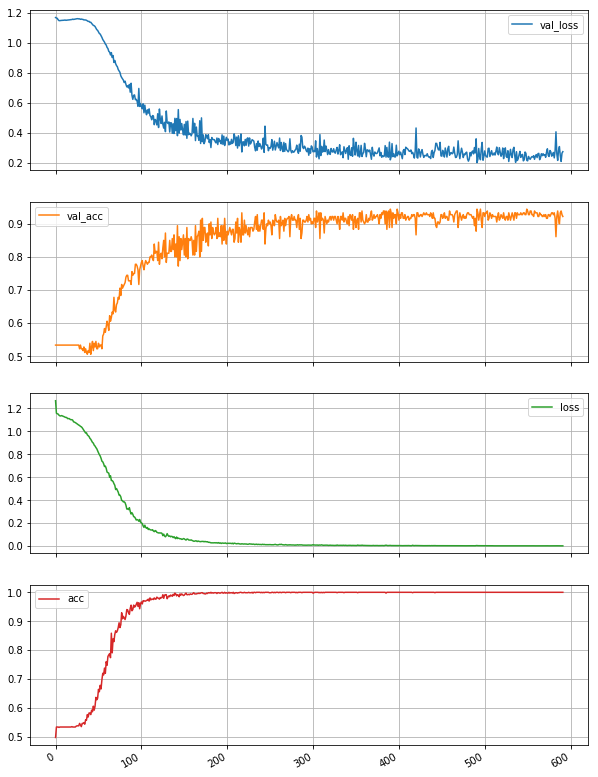

In [34]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [35]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "other"
    elif encodedLabel == 1:
        return "fizz"
    elif encodedLabel == 2:
        return "buzz"
    elif encodedLabel == 3:
        return "fizzbuzz"

In [36]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "APURBAMA")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50288705")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 5  Correct :95
Testing Accuracy: 95.0
